In [13]:
import os
import zipfile

# Set up Kaggle API credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle API if not already installed
!pip install -q kaggle

# Specify the Kaggle dataset API URL
kaggle_dataset_url = 'emmarex/plantdisease'  # Replace with your dataset's Kaggle URL

# Download the dataset
!kaggle datasets download -d {kaggle_dataset_url}

# Unzip the dataset
zip_file_path = kaggle_dataset_url.split('/')[-1] + '.zip'
extract_dir = '/content/dataset'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the contents of the extraction directory
print("Contents of the extraction directory:")
print(os.listdir(extract_dir))


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 98% 643M/658M [00:06<00:00, 128MB/s]
100% 658M/658M [00:06<00:00, 111MB/s]
Contents of the extraction directory:
['plantvillage', 'PlantVillage']


In [18]:
import os

# Verify the contents of the base extraction directory
base_dir = extract_dir
print("Contents of the base directory:")
print(os.listdir(base_dir))

# List subdirectories to confirm structure
for subdir in os.listdir(base_dir):
    print(f"Contents of {subdir}:")
    print(os.listdir(os.path.join(base_dir, subdir)))
plt.show()


Contents of the base directory:
['plantvillage', 'PlantVillage']
Contents of plantvillage:
['PlantVillage']
Contents of PlantVillage:
['Tomato_Early_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Leaf_Mold', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___Bacterial_spot', 'Tomato_Bacterial_spot', 'Potato___healthy', 'Potato___Late_blight', 'Pepper__bell___healthy', 'Tomato__Target_Spot', 'Tomato_healthy', 'Tomato_Septoria_leaf_spot', 'Potato___Early_blight', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus']


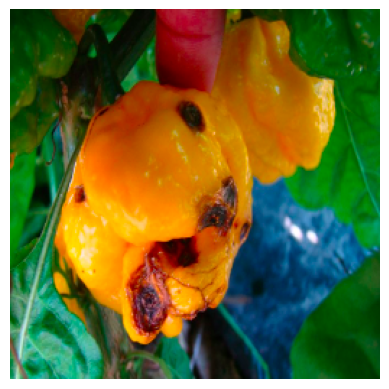

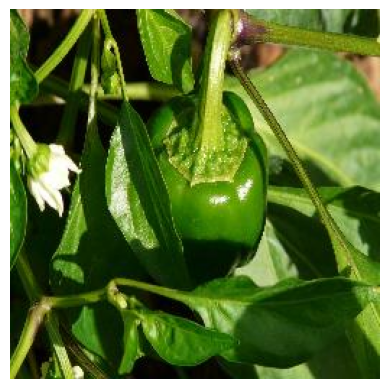

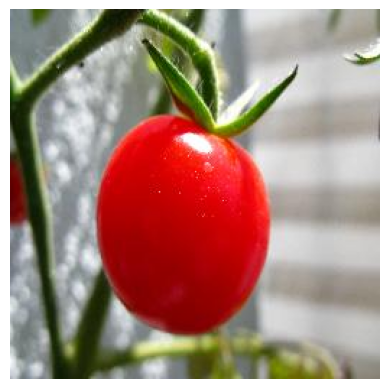

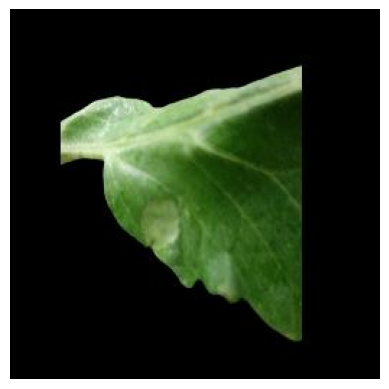

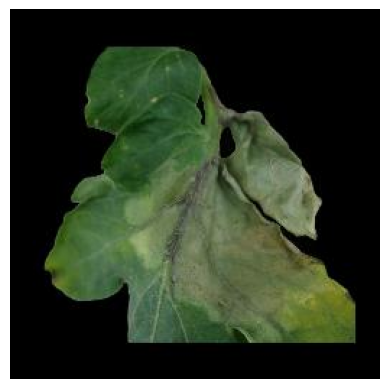

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Example: Display some images
def display_images(base_dir, num_images=5):
    image_paths = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
                image_paths.append(os.path.join(root, file))

    for img_path in image_paths[:num_images]:
        img = load_img(img_path)
        img_array = img_to_array(img)
        plt.figure()
        plt.imshow(img_array / 255.0)
        plt.axis('off')
        plt.show()

display_images(base_dir)


In [38]:
from PIL import Image
import os

# Assuming your images are located in a directory named 'images'
images_dir = '/content/extracted_files/PlantVillage'

# List all image files in the directory
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

# Load and display the first few images
num_images_to_display = 5
for image_file in image_files[:num_images_to_display]:
    image_path = os.path.join(images_dir, image_file)
    image = Image.open(image_path)
    image.show(2)





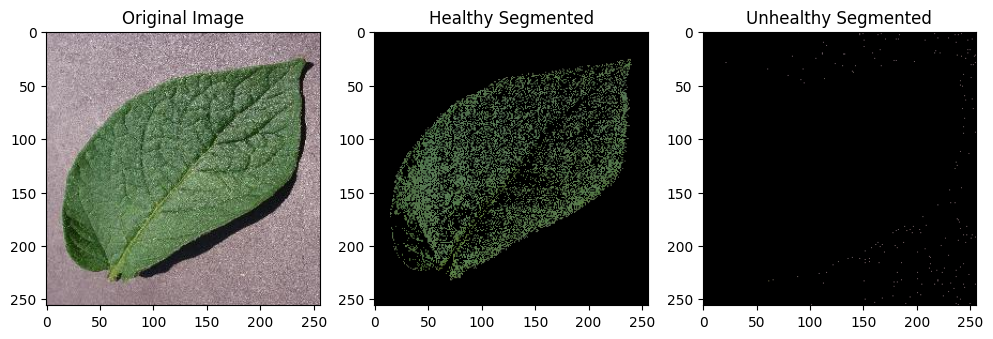

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/extracted_files/PlantVillage/Potato___healthy/04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG')

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define thresholds for healthy and unhealthy leaves (example thresholds)
healthy_lower = np.array([0, 100, 0], dtype=np.uint8)
healthy_upper = np.array([100, 255, 100], dtype=np.uint8)

unhealthy_lower = np.array([100, 0, 0], dtype=np.uint8)
unhealthy_upper = np.array([255, 100, 100], dtype=np.uint8)

# Mask healthy and unhealthy regions
healthy_mask = cv2.inRange(image_rgb, healthy_lower, healthy_upper)
unhealthy_mask = cv2.inRange(image_rgb, unhealthy_lower, unhealthy_upper)

# Apply the masks to the original image
healthy_segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=healthy_mask)
unhealthy_segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=unhealthy_mask)

# Display the original image and segmented regions
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(healthy_segmented)
plt.title('Healthy Segmented')

plt.subplot(1, 3, 3)
plt.imshow(unhealthy_segmented)
plt.title('Unhealthy Segmented')

plt.show()


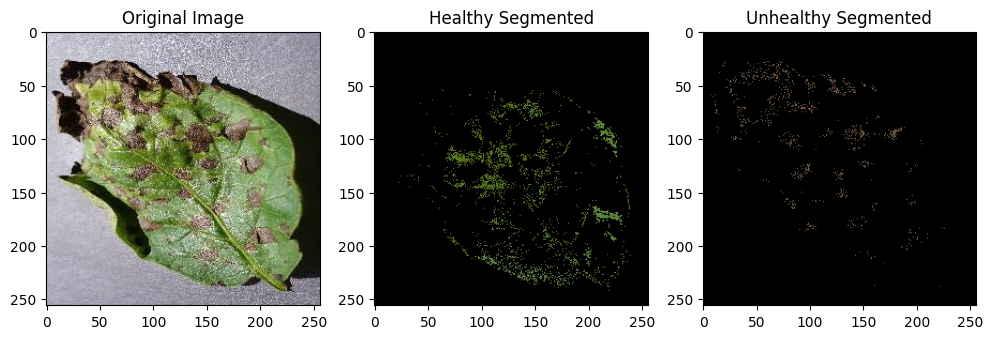

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/extracted_files/PlantVillage/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG')

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define thresholds for healthy and unhealthy leaves (example thresholds)
healthy_lower = np.array([0, 100, 0], dtype=np.uint8)
healthy_upper = np.array([100, 255, 100], dtype=np.uint8)

unhealthy_lower = np.array([100, 0, 0], dtype=np.uint8)
unhealthy_upper = np.array([255, 100, 100], dtype=np.uint8)

# Mask healthy and unhealthy regions
healthy_mask = cv2.inRange(image_rgb, healthy_lower, healthy_upper)
unhealthy_mask = cv2.inRange(image_rgb, unhealthy_lower, unhealthy_upper)

# Apply the masks to the original image
healthy_segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=healthy_mask)
unhealthy_segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=unhealthy_mask)

# Display the original image and segmented regions
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(healthy_segmented)
plt.title('Healthy Segmented')

plt.subplot(1, 3, 3)
plt.imshow(unhealthy_segmented)
plt.title('Unhealthy Segmented')

plt.show()